# Abalone Data를 이용하여 딥러닝 분류하기

In [25]:
# 사용 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [11]:
# csv 파일 불러오기
df = pd.read_csv("/Users/user/Downloads/abalone.csv", index_col = 0)

In [13]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [15]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [ ]:
# 결측치 확인
df.isnull().sum()

In [17]:
# 결측치 제거
df = df.dropna()

In [19]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

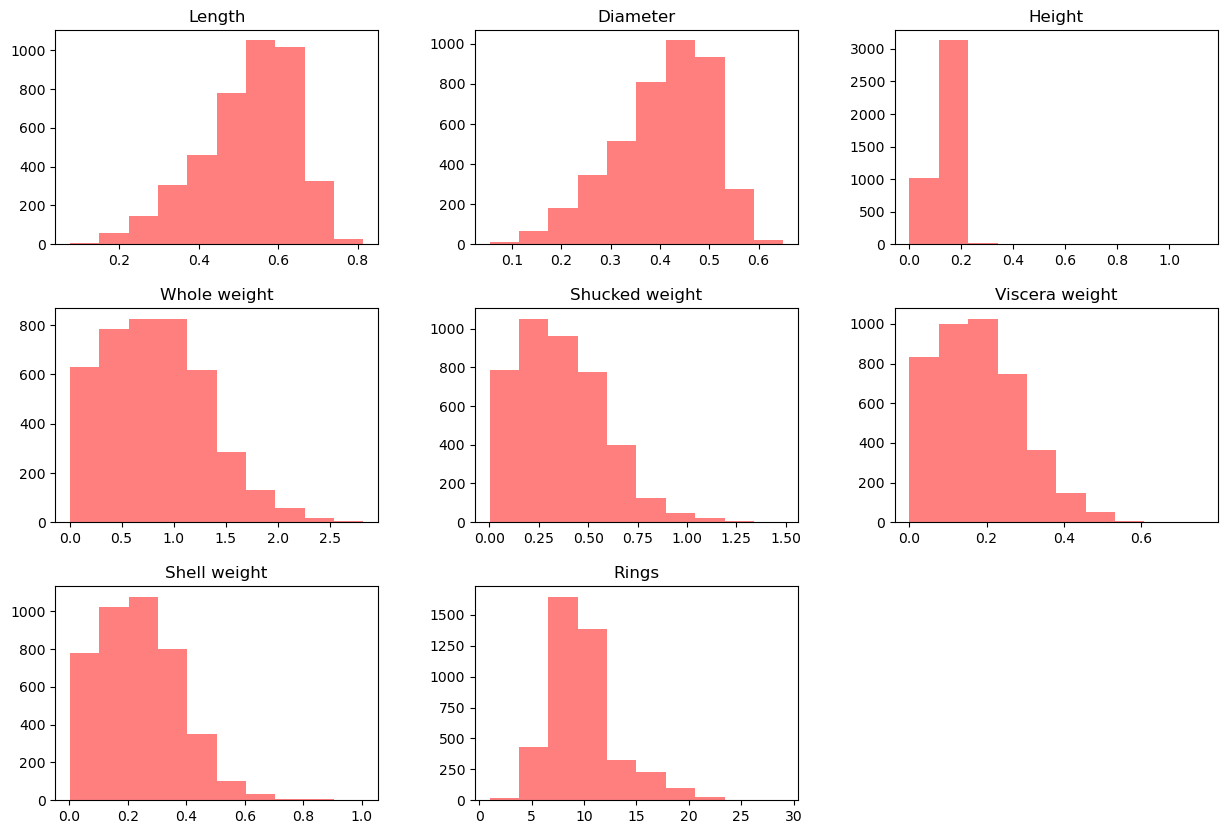

In [21]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='red')

Text(0.5, 1.0, 'Abalone of Rings')

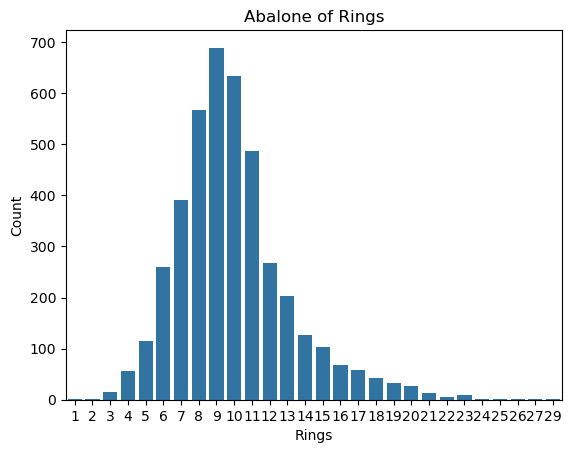

In [57]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone of Rings")

In [59]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [61]:
import pandas as pd

# 기존 abalone 데이터셋 로드
# 데이터가 abalone.csv 파일에 있다고 가정

# rings=1인 데이터와 rings=29인 데이터 추출
rings_1_data = df[df['Rings'] == 1].copy()
rings_29_data = df[df['Rings'] == 29].copy()

# rings=1인 데이터를 rings=0으로 변경
rings_1_data['Rings'] = 0

# rings=29인 데이터를 rings=28로 변경
rings_29_data['Rings'] = 28

# 기존 데이터에 rings=0과 rings=28 데이터를 추가
df = pd.concat([df, rings_1_data, rings_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

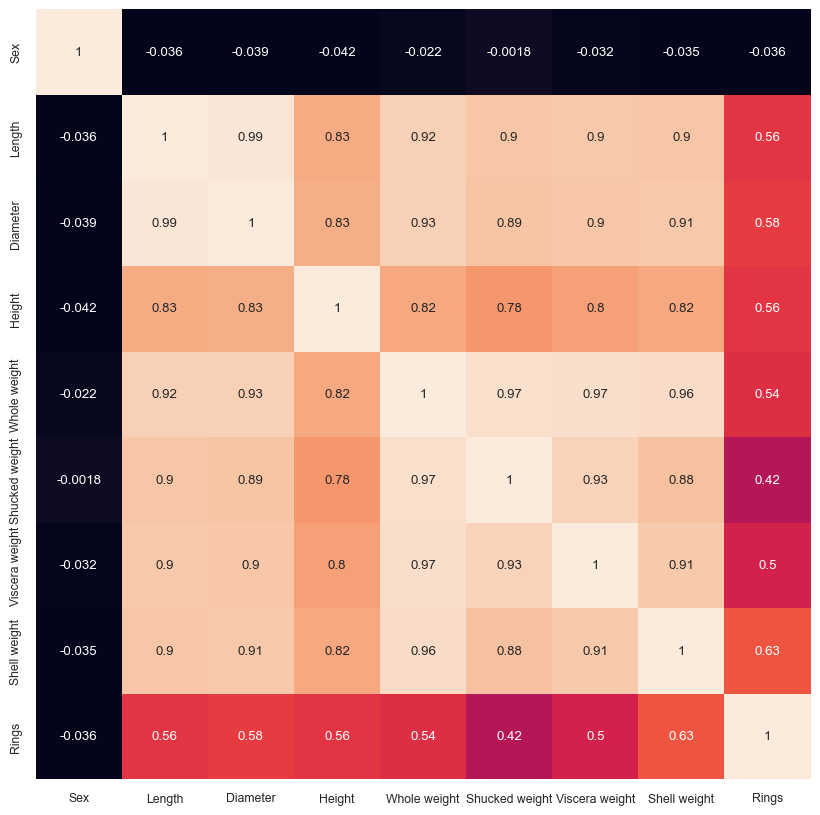

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드 (이미 로드된 데이터가 있을 경우 생략 가능)
# df = pd.read_csv('abalone.csv')

# 2. 범주형 변수 'Sex'를 숫자로 변환 (Label Encoding)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# 3. 상관 관계를 계산할 열들 선택
df_corr = df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

# 4. 상관관계 행렬 계산
df_corr = df_corr.corr()

# 5. 히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


Sex, Rings은 다른 특성들과의 상관관계가 특히 낮다.

Abalone 데이터에 따르면, Rings 값에 1.5를 더하면 전복의 나이가 된다고 한다.

In [72]:
# Convert RingCount to Age by adding 1.5, accoring to codebook
df['Age'] = df['Rings'] + 1.5
# df.drop('Rings', axis=1, inplace=True)

## Train Test Spilt

In [77]:
X=df.drop(['Age', 'Rings'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [81]:
new_df = df.copy()

y label을 5와 15를 기준으로 나눔

인터넷 서칭 상에는 5와 15사이에 많은 전복들이 존재한다는 것을 가리키는 글이 존재함

In [85]:
new_df['newRings_1'] = np.where(df['Rings'] <= 5, 1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 5) & (df['Rings'] <= 15)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 15, 3,0)

new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [89]:
X=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [91]:
y = new_df['newRings']
y.value_counts().sort_index(ascending=True)

newRings
1     190
2    3727
3     262
Name: count, dtype: int64

In [93]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [ True, False, False],
       [False, False,  True]])

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2788,0.615,0.460,0.150,1.0265,0.4935,0.2010,0.2745
1752,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
2224,0.550,0.425,0.145,0.7970,0.2970,0.1500,0.2650
3389,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300
3851,0.560,0.440,0.130,0.8255,0.2425,0.2020,0.2850
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [97]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [99]:
X_train.shape[1]


7

In [101]:
y_test.shape[1]

3

## Make Dense Layer

In [104]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

In [106]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x) 

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,923 (70.01 KB)

 Trainable params: 17,923 (70.01 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_split = 0.1, shuffle = True)
pred_DL = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(pred_DL,axis=1)


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9178 - loss: 0.1993 - val_accuracy: 0.9236 - val_loss: 0.2162
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9226 - loss: 0.1912 - val_accuracy: 0.9204 - val_loss: 0.2183
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.9150 - loss: 0.1942 - val_accuracy: 0.9108 - val_loss: 0.2202
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9148 - loss: 0.1998 - val_accuracy: 0.9108 - val_loss: 0.2117
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.9130 - loss: 0.1985 - val_accuracy: 0.9076 - val_loss: 0.2167
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9080 - loss: 0.2132 - val_accuracy: 0.9172 - val_loss: 0.2141
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9190 - loss: 0.1983 - val_accuracy: 0.9140 - val_loss: 0.2139
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9207 - loss: 0.1929 - val_accuracy: 0.

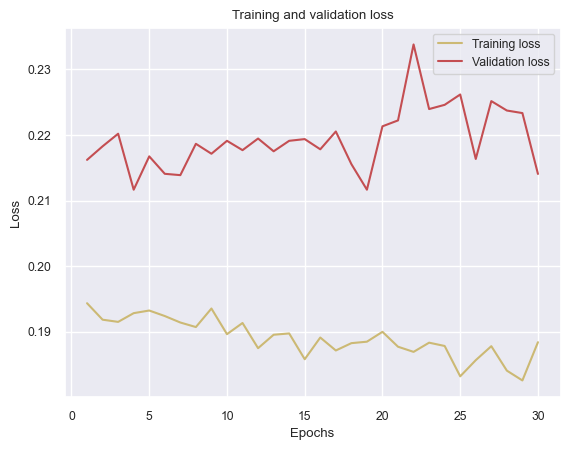

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

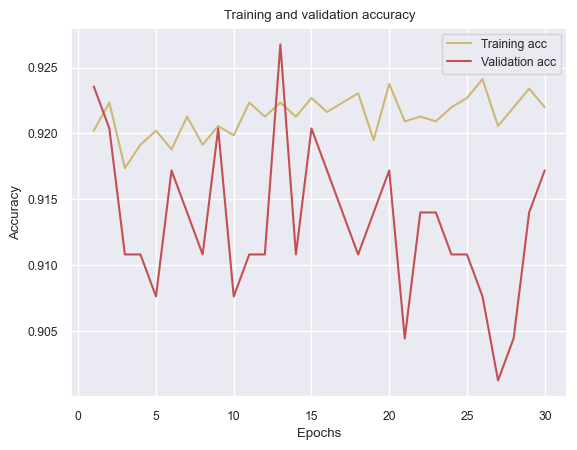

In [114]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        53
           1       0.92      0.97      0.95       938
           2       0.39      0.17      0.23        54

    accuracy                           0.90      1045
   macro avg       0.66      0.53      0.57      1045
weighted avg       0.88      0.90      0.89      1045

[[ 24  29   0]
 [ 12 912  14]
 [  0  45   9]]
